In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

In [55]:
weather_data = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')
gen_data = pd.read_csv('../data/Plant_1_Generation_Data.csv')
weather_data['DATE_TIME']= pd.to_datetime(weather_data['DATE_TIME'])
gen_data['DATE_TIME']= pd.to_datetime(gen_data['DATE_TIME'])
merged_df = pd.merge(gen_data, weather_data, how='inner', on=['DATE_TIME'], suffixes=('', '_y'))
X= merged_df.loc[:, ['DC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[0.        , 0.32219047, 0.09950559, 0.        ],
       [0.        , 0.32219047, 0.09950559, 0.        ],
       [0.        , 0.32219047, 0.09950559, 0.        ],
       ...,
       [0.        , 0.10170895, 0.0482553 , 0.        ],
       [0.        , 0.10170895, 0.0482553 , 0.        ],
       [0.        , 0.10170895, 0.0482553 , 0.        ]])

In [5]:
input_layer = Input(shape =(X.shape[1], ))

encoded = Dense(100, activation ='tanh',activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoded = Dense(75, activation ='tanh',activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(50, activation ='tanh',activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(25, activation ='tanh',activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation ='tanh',activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(6, activation ='relu')(encoded)

decoded = Dense(12, activation ='tanh')(encoded)
decoded = Dense(25, activation ='tanh')(decoded)
decoded = Dense(50, activation ='tanh')(decoded)
decoded = Dense(75, activation ='tanh')(decoded)
decoded = Dense(100, activation ='tanh')(decoded)

output_layer = Dense(X.shape[1], activation ='relu')(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adadelta", loss ="mse")

History=autoencoder.fit(X_scaled, X_scaled,batch_size = 400, epochs = 50,shuffle = True, validation_split = 0.10)

Epoch 1/50
155/155 [==============================] - 3s 8ms/step - loss: 0.0959 - val_loss: 0.0505
Epoch 2/50
155/155 [==============================] - 1s 5ms/step - loss: 0.0797 - val_loss: 0.0408
Epoch 3/50
155/155 [==============================] - 1s 5ms/step - loss: 0.0654 - val_loss: 0.0326
Epoch 4/50
155/155 [==============================] - 1s 5ms/step - loss: 0.0541 - val_loss: 0.0264
Epoch 5/50
155/155 [==============================] - 1s 5ms/step - loss: 0.0437 - val_loss: 0.0219
Epoch 6/50
155/155 [==============================] - 1s 5ms/step - loss: 0.0364 - val_loss: 0.0185
Epoch 7/50
155/155 [==============================] - 1s 5ms/step - loss: 0.0303 - val_loss: 0.0156
Epoch 8/50
155/155 [==============================] - 1s 5ms/step - loss: 0.0255 - val_loss: 0.0133
Epoch 9/50
155/155 [==============================] - 1s 5ms/step - loss: 0.0218 - val_loss: 0.0115
Epoch 10/50
155/155 [==============================] - 1s 5ms/step - loss: 0.0189 - val_loss: 0.0101

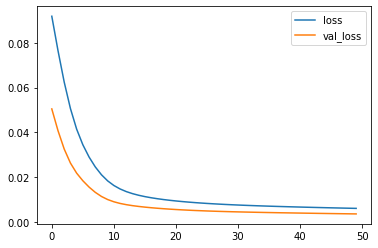

In [6]:
plt.plot(History.history['loss'], label='loss')
plt.plot(History.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [7]:
encoded_train_data=autoencoder.predict(X_scaled)
#decoded_train_data=autoencoder.predict(encoded_train_data)
#decoded_train_data

In [8]:
X_scaled_df=pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
scaled_train_features = pd.DataFrame(encoded_train_data, index=X.index, columns=X.columns)
scaled_train_features

,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,0.0,0.252683,0.096378,0.0
1,0.0,0.252683,0.096378,0.0
2,0.0,0.252683,0.096378,0.0
3,0.0,0.252683,0.096378,0.0
4,0.0,0.252683,0.096378,0.0
...,...,...,...,...
68769,0.0,0.137058,0.000000,0.0
68770,0.0,0.137058,0.000000,0.0
68771,0.0,0.137058,0.000000,0.0
68772,0.0,0.137058,0.000000,0.0


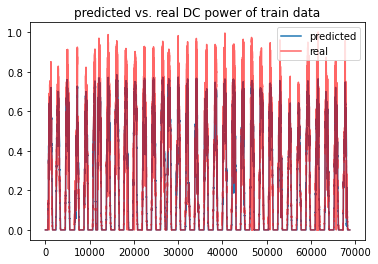

In [9]:
# plt.figure(figsize=(15, 10))
plt.plot(scaled_train_features.DC_POWER, label='predicted')
plt.plot(X_scaled_df.DC_POWER, label='real', color='r', alpha=0.6)
plt.title('predicted vs. real DC power of train data')
plt.legend()
plt.show()

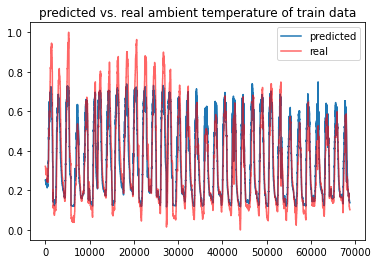

In [10]:
# plt.figure(figsize=(15, 10))
plt.plot(scaled_train_features.AMBIENT_TEMPERATURE, label='predicted')
plt.plot(X_scaled_df.AMBIENT_TEMPERATURE, label='real', color='r', alpha=0.6)
plt.title('predicted vs. real ambient temperature of train data')
plt.legend()
plt.show()

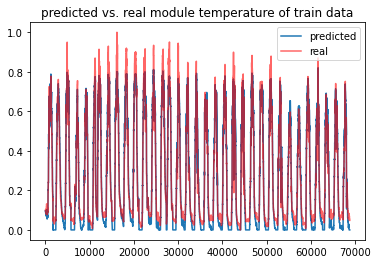

In [11]:
# plt.figure(figsize=(15, 10))
plt.plot(scaled_train_features.MODULE_TEMPERATURE, label='predicted')
plt.plot(X_scaled_df.MODULE_TEMPERATURE, label='real', color='r', alpha=0.6)
plt.title('predicted vs. real module temperature of train data')
plt.legend()
plt.show()

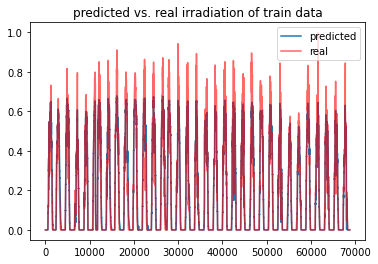

In [12]:
# plt.figure(figsize=(15, 10))
plt.plot(scaled_train_features.IRRADIATION, label='predicted')
plt.plot(X_scaled_df.IRRADIATION, label='real', color='r', alpha=0.6)
plt.title('predicted vs. real irradiation of train data')
plt.legend()
plt.show()

## Calculate the  mean squared error

In [57]:
train_mae_loss = np.mean((X_scaled_df - scaled_train_features)**2, axis=1)

In [58]:
merged_df=merged_df.join(pd.DataFrame(train_mae_loss))

### the points with higher error value are outliers

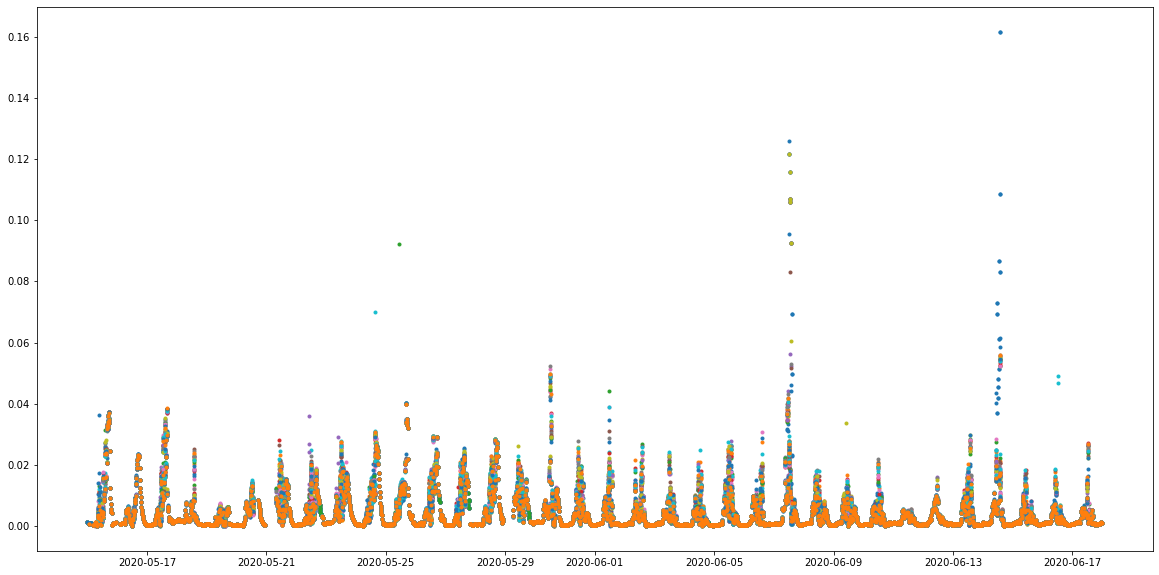

In [73]:
plt.figure(figsize=(20,10))
for inv in merged_df.SOURCE_KEY.unique():
    plt.plot(merged_df[merged_df['SOURCE_KEY']==inv]['DATE_TIME'], merged_df[merged_df['SOURCE_KEY']==inv][0], '.')

## we can calculate a 'normal' error variation interval by taking for example the standard deviation of the residual values

<AxesSubplot:>

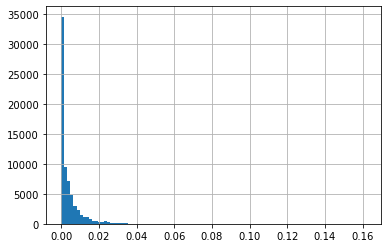

In [68]:
merged_df[merged_df[0]>0][0].hist(bins=100)

In [70]:
merged_df[0].std()

0.006209890142626368

## the points above the vlue of 0.04 are definitely outliers. we can also define them by using the std. for example the points x*std away from 0 are going to be outliers for higher x. we can take for example 8 or 10 sts

In [71]:
print(8*merged_df[0].std(), 10*merged_df[0].std())

0.049679121141010946 0.06209890142626368


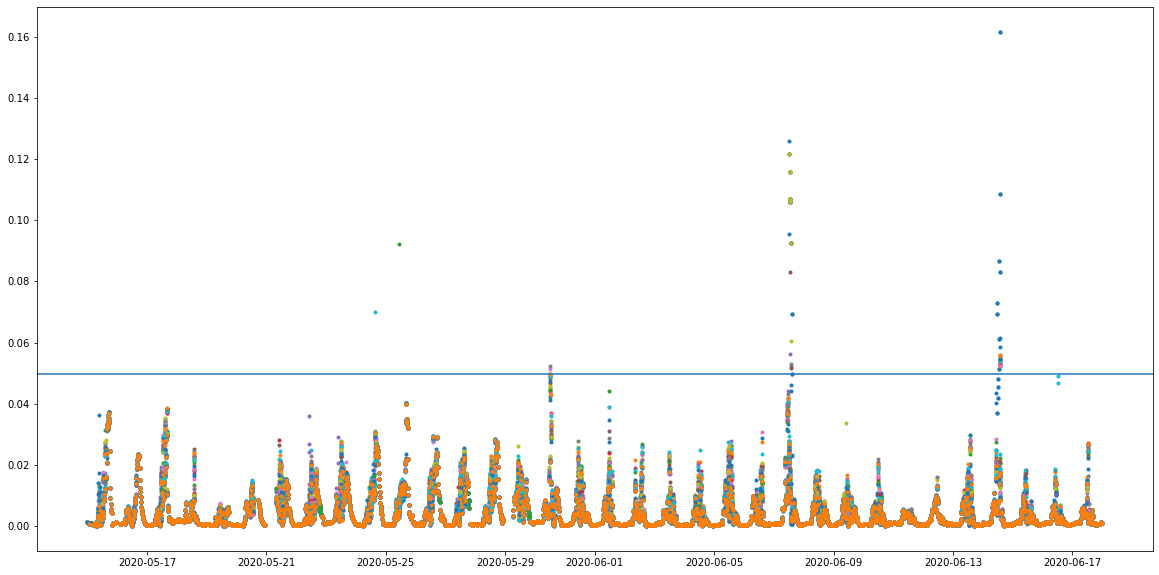

In [74]:
plt.figure(figsize=(20,10))
for inv in merged_df.SOURCE_KEY.unique():
    plt.plot(merged_df[merged_df['SOURCE_KEY']==inv]['DATE_TIME'], merged_df[merged_df['SOURCE_KEY']==inv][0], '.')
plt.axhline(8*merged_df[0].std())

<ipython-input-72-08eb6633edd3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,5))


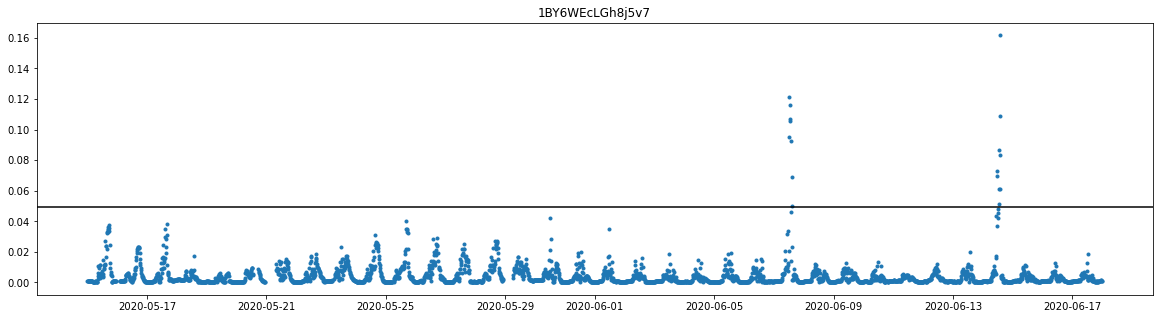

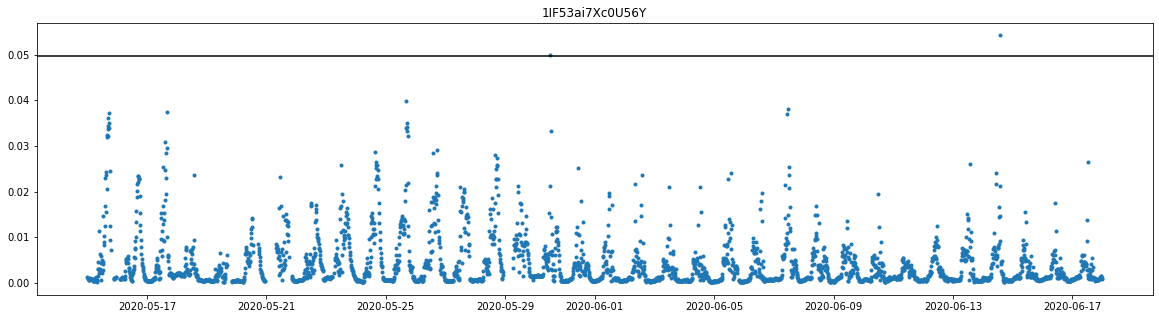

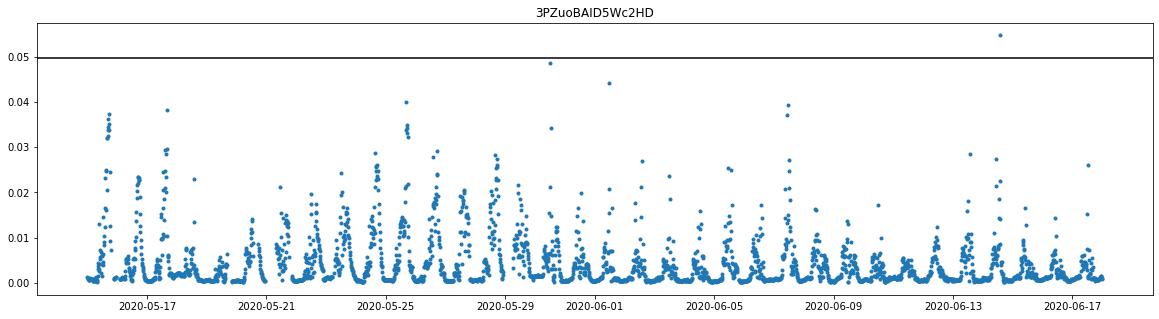

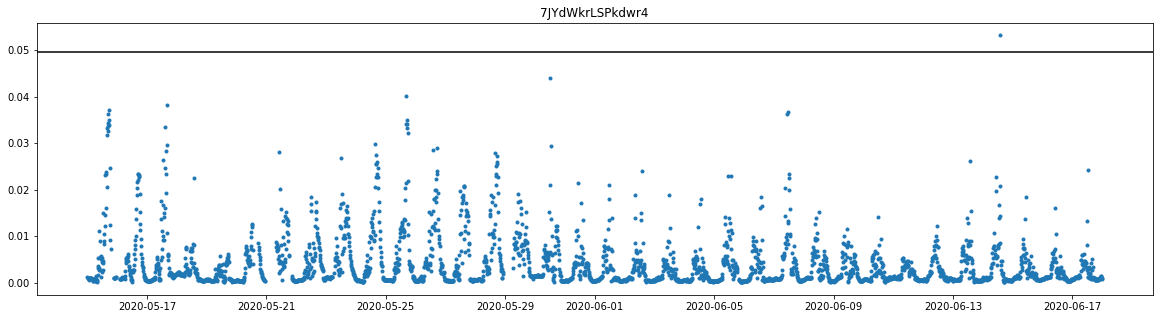

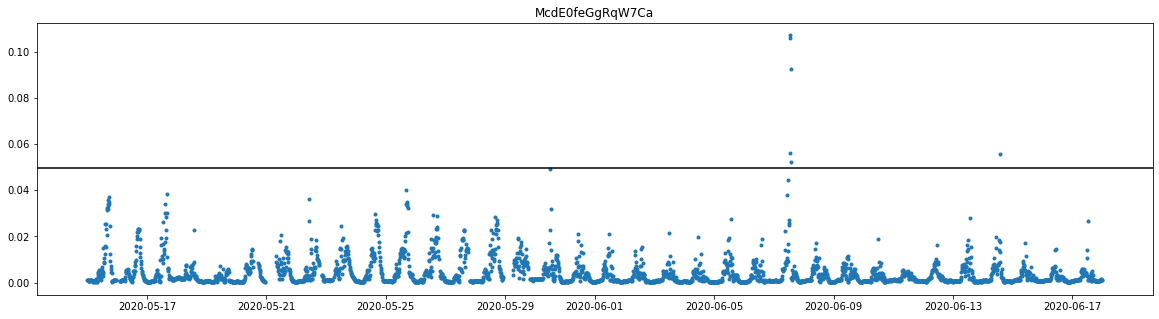

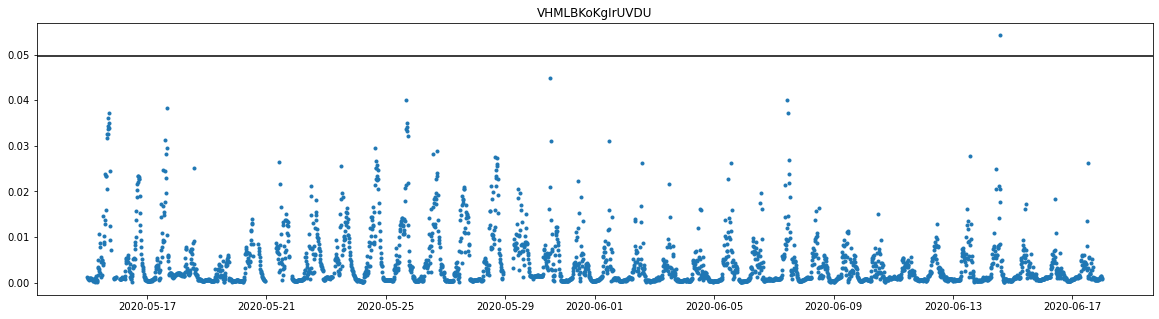

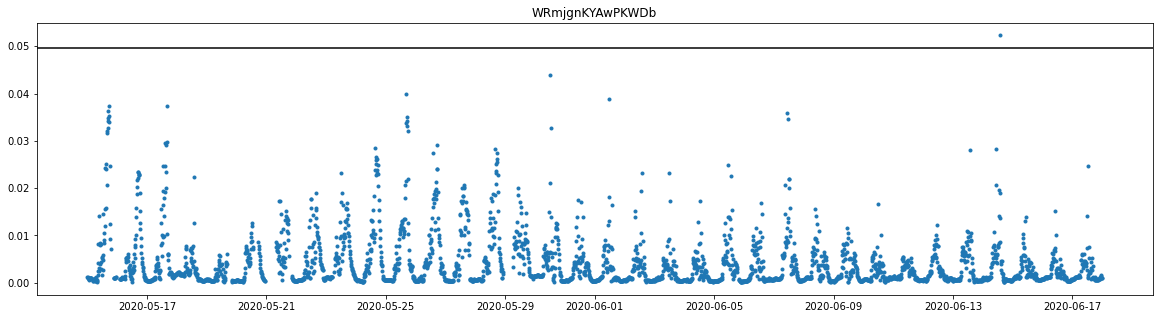

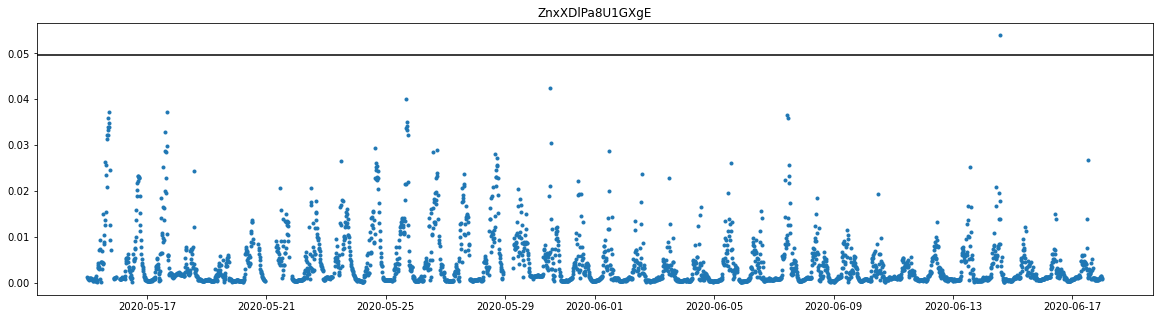

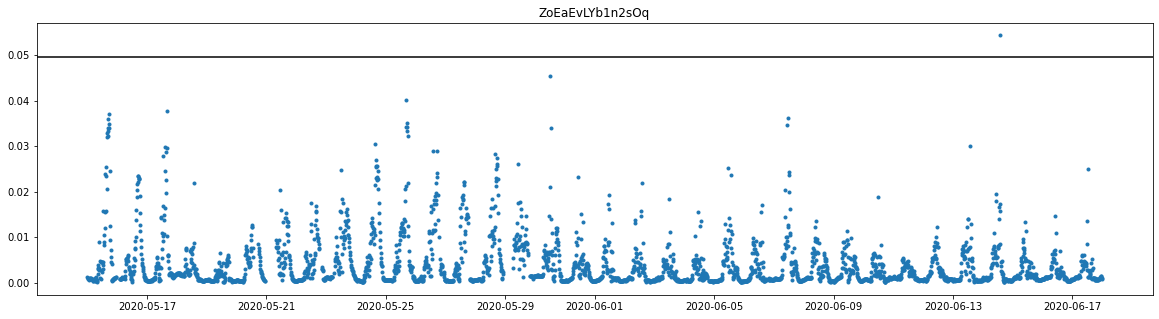

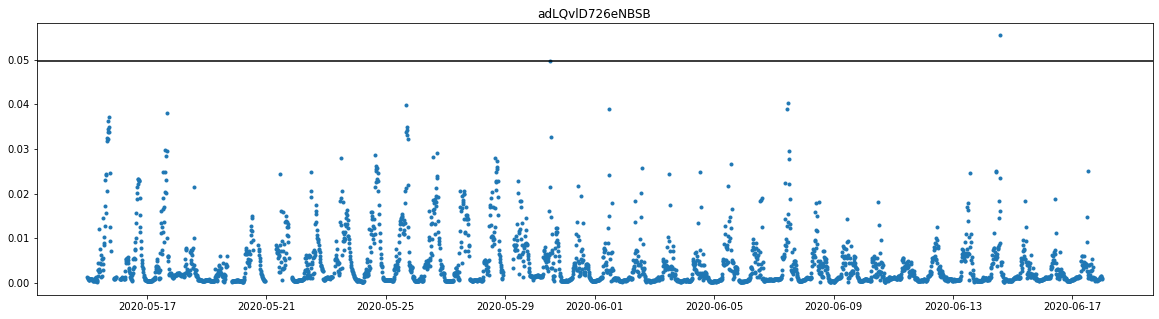

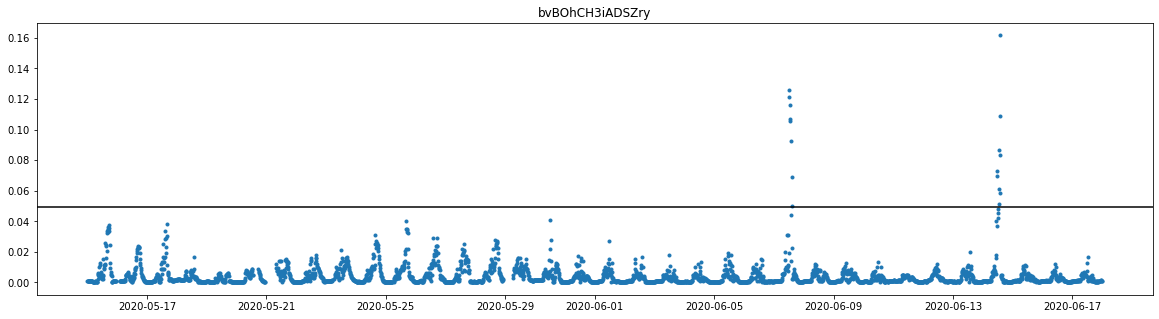

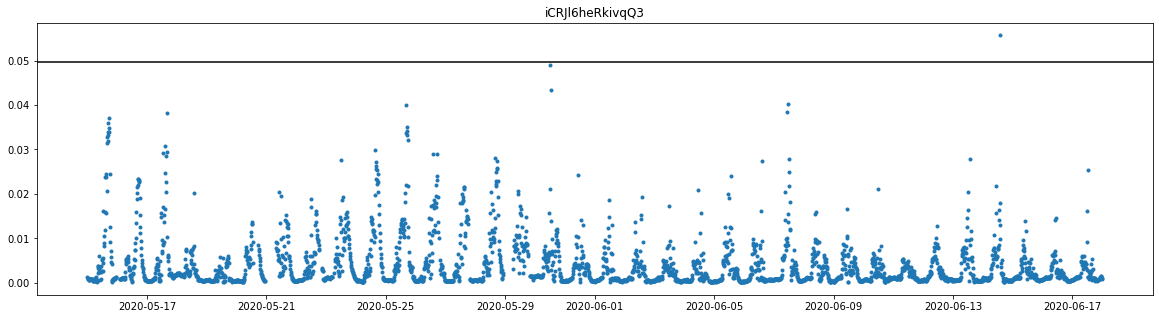

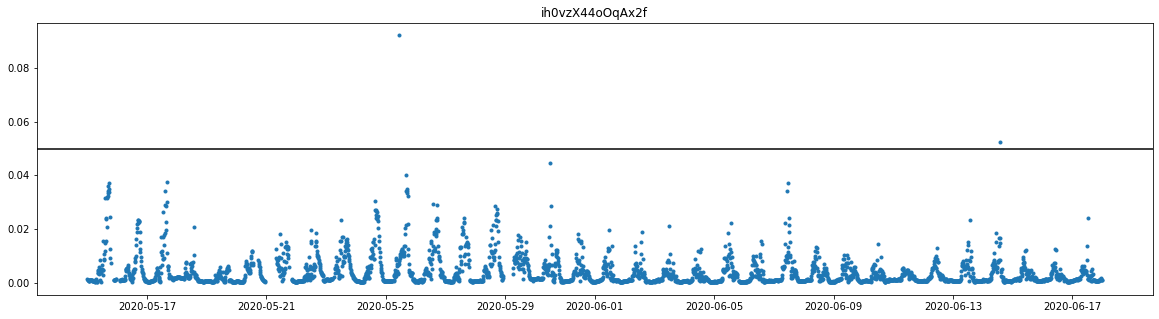

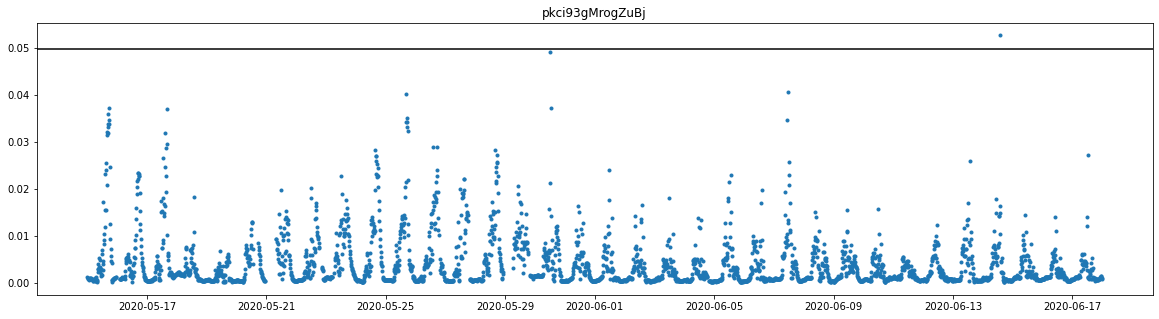

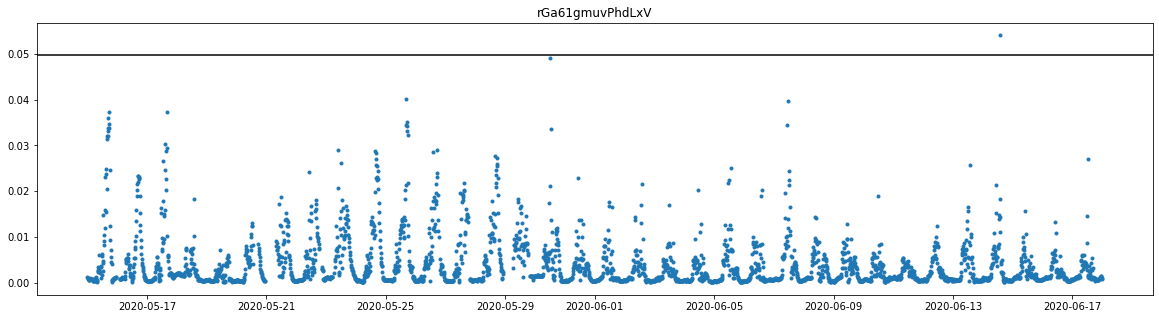

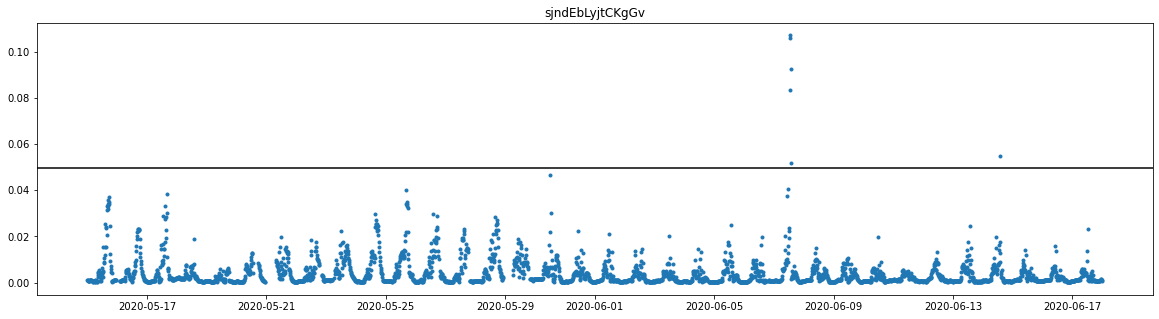

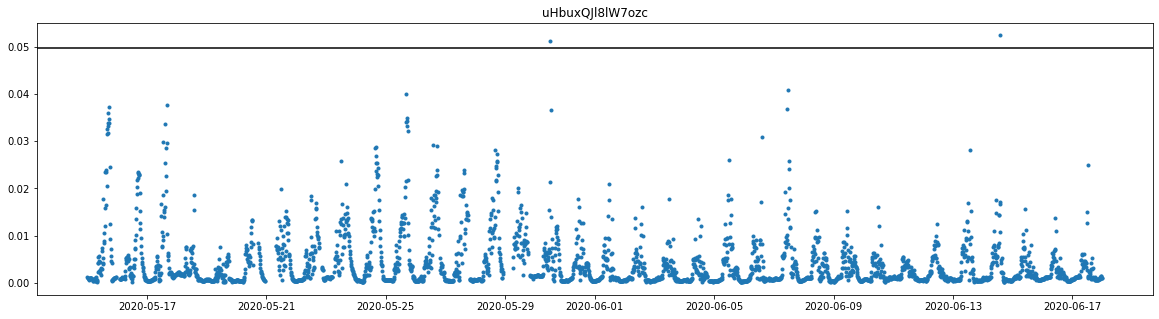

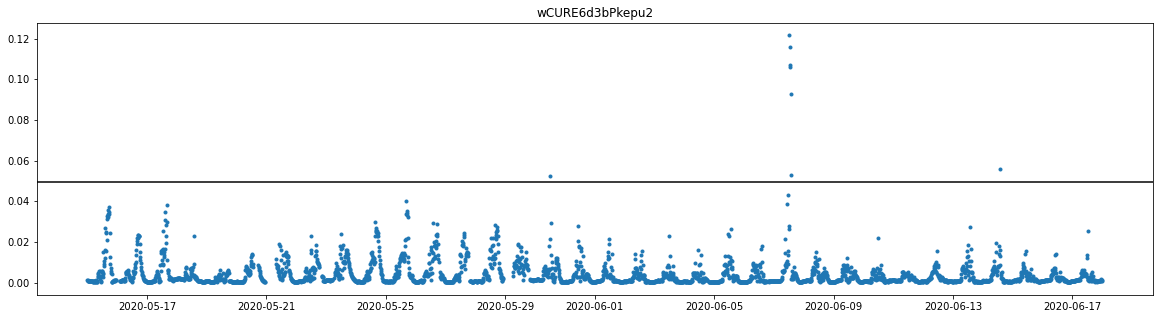

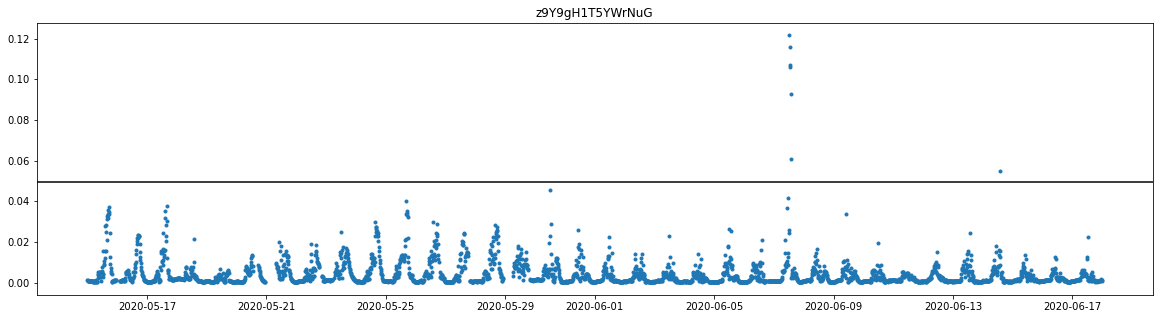

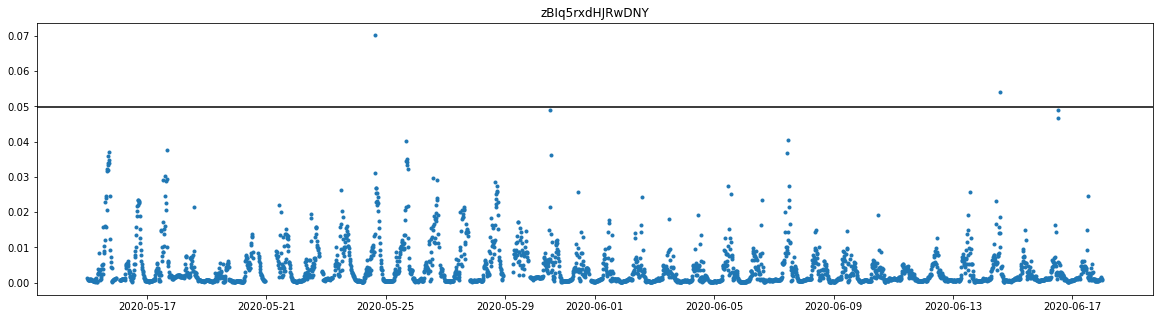

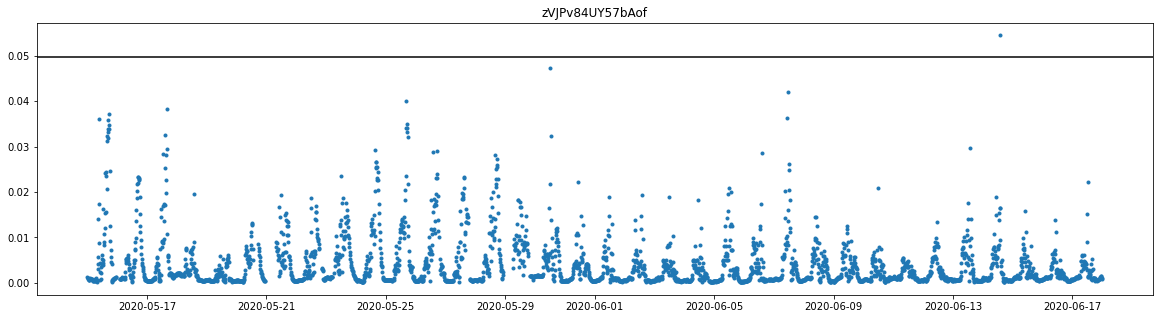

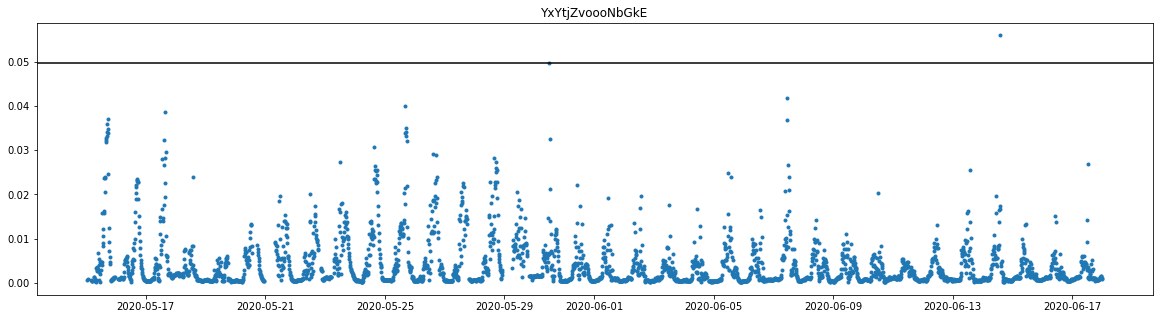

In [72]:
for inv in merged_df.SOURCE_KEY.unique():
    plt.figure(figsize=(20,5))
    plt.plot(merged_df[merged_df['SOURCE_KEY']==inv]['DATE_TIME'], merged_df[merged_df['SOURCE_KEY']==inv][0], '.')
    plt.axhline(8*merged_df[0].std(), color='black')
    plt.title(inv)

### the points outside this limit should be anomalous points. at this point it is interesting to compare the results with the outcome of the first part of the work, where we were looking at single outliers in the DC power behaviour, you could compare a few cases
1. it is also clear that a couple of inverters have a particularly anomalous behaviour on a couple of days, around 07 june and 15 june. it's likely that these are the points that were affecting your linear fits originally. one could check what is happening on those days and for those inverters
2. you can quantify an overal inverter behaviour for a day, by taking maybe the sum, or the mean of the reconstructioon error for the entire inverter per day or overall

In [78]:
merged_df.groupby('SOURCE_KEY')[0].mean()

SOURCE_KEY
1BY6WEcLGh8j5v7    0.004484
1IF53ai7Xc0U56Y    0.004031
3PZuoBAID5Wc2HD    0.004079
7JYdWkrLSPkdwr4    0.003972
McdE0feGgRqW7Ca    0.004134
VHMLBKoKgIrUVDU    0.004049
WRmjgnKYAwPKWDb    0.004034
YxYtjZvoooNbGkE    0.003962
ZnxXDlPa8U1GXgE    0.004016
ZoEaEvLYb1n2sOq    0.003901
adLQvlD726eNBSB    0.004113
bvBOhCH3iADSZry    0.004479
iCRJl6heRkivqQ3    0.003937
ih0vzX44oOqAx2f    0.003977
pkci93gMrogZuBj    0.003962
rGa61gmuvPhdLxV    0.003962
sjndEbLyjtCKgGv    0.004035
uHbuxQJl8lW7ozc    0.003975
wCURE6d3bPkepu2    0.004194
z9Y9gH1T5YWrNuG    0.004188
zBIq5rxdHJRwDNY    0.003969
zVJPv84UY57bAof    0.003969
Name: 0, dtype: float64

<AxesSubplot:>

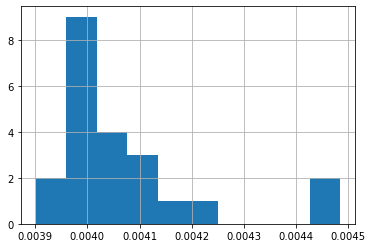

In [77]:
merged_df.groupby('SOURCE_KEY')[0].mean().hist()

### taking the mean for the entire inverter is dominated by few outlier points. if I take the mean for the points that are not outlier, I could see efficiency differences

<AxesSubplot:>

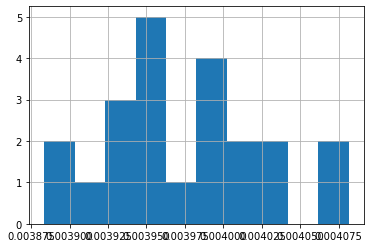

In [79]:
merged_df[merged_df[0]<8*merged_df[0].std()].groupby('SOURCE_KEY')[0].mean().hist()

In [80]:
merged_df[merged_df[0]<8*merged_df[0].std()].groupby('SOURCE_KEY')[0].mean()

SOURCE_KEY
1BY6WEcLGh8j5v7    0.004026
1IF53ai7Xc0U56Y    0.004000
3PZuoBAID5Wc2HD    0.004063
7JYdWkrLSPkdwr4    0.003957
McdE0feGgRqW7Ca    0.003991
VHMLBKoKgIrUVDU    0.004033
WRmjgnKYAwPKWDb    0.004019
YxYtjZvoooNbGkE    0.003930
ZnxXDlPa8U1GXgE    0.004000
ZoEaEvLYb1n2sOq    0.003885
adLQvlD726eNBSB    0.004081
bvBOhCH3iADSZry    0.004012
iCRJl6heRkivqQ3    0.003920
ih0vzX44oOqAx2f    0.003933
pkci93gMrogZuBj    0.003946
rGa61gmuvPhdLxV    0.003946
sjndEbLyjtCKgGv    0.003884
uHbuxQJl8lW7ozc    0.003944
wCURE6d3bPkepu2    0.003979
z9Y9gH1T5YWrNuG    0.003986
zBIq5rxdHJRwDNY    0.003932
zVJPv84UY57bAof    0.003953
Name: 0, dtype: float64

(array(18420.), array(18428.))

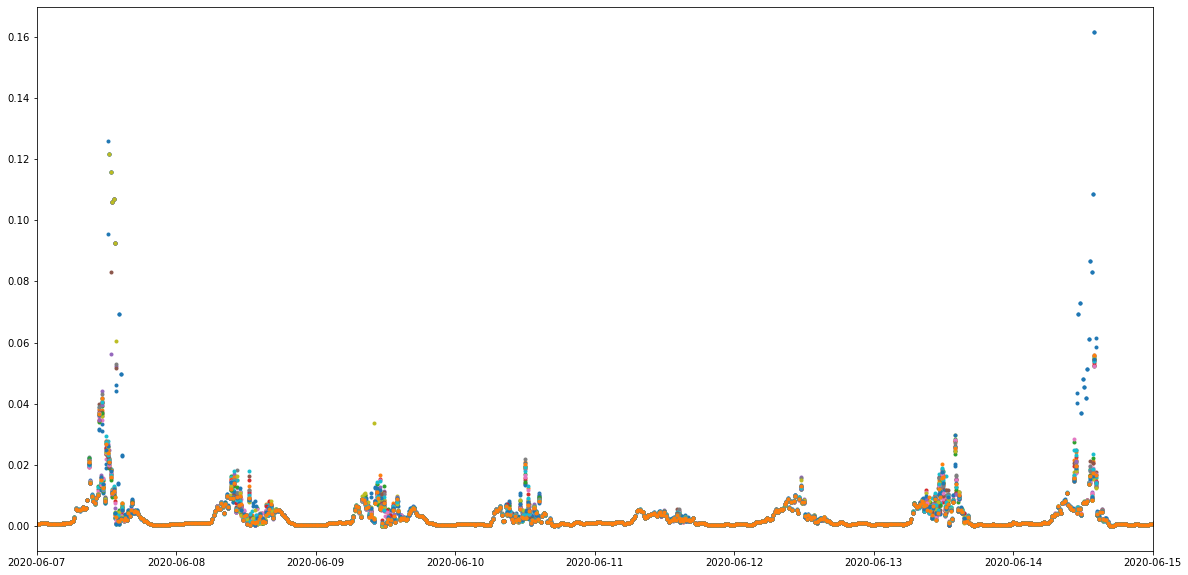

In [45]:
plt.figure(figsize=(20,10))
for inv in merged_df.SOURCE_KEY.unique():
    plt.plot(merged_df[merged_df['SOURCE_KEY']==inv]['DATE_TIME'], merged_df[merged_df['SOURCE_KEY']==inv][0], '.')
plt.xlim('2020-06-07', '2020-06-15')

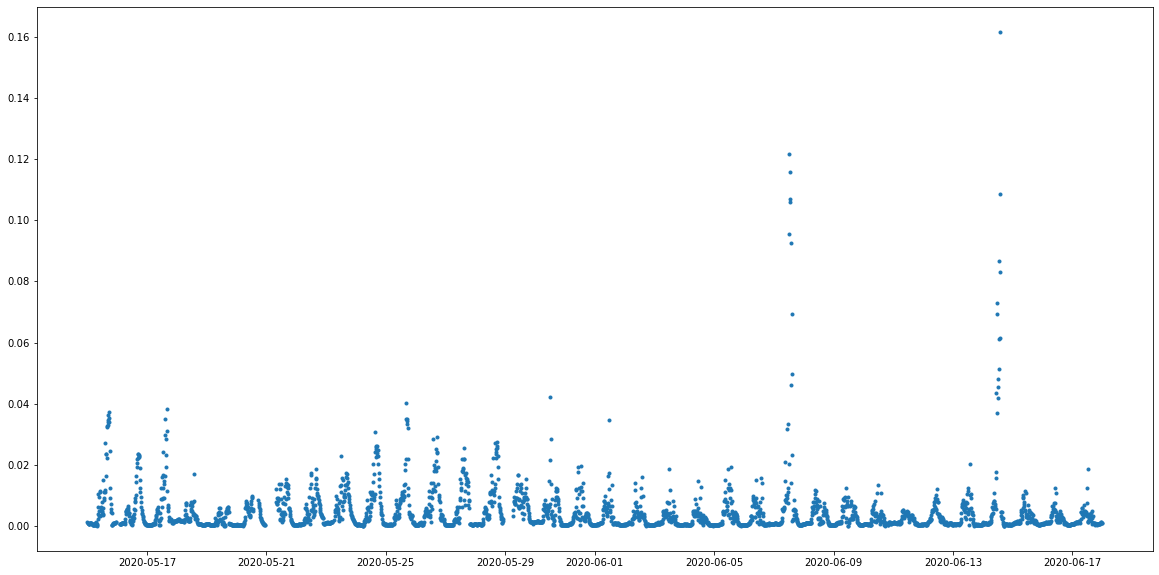

In [46]:
plt.figure(figsize=(20,10))
for inv in merged_df.SOURCE_KEY.unique()[0:1]:
    plt.plot(merged_df[merged_df['SOURCE_KEY']==inv]['DATE_TIME'], merged_df[merged_df['SOURCE_KEY']==inv][0], '.')


## testing on second plant

In [13]:
weather_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')
gen_data = pd.read_csv('Plant_2_Generation_Data.csv')
weather_data['DATE_TIME']= pd.to_datetime(weather_data['DATE_TIME'])
gen_data['DATE_TIME']= pd.to_datetime(gen_data['DATE_TIME'])
merged_df = pd.merge(gen_data, weather_data, how='inner', on=['DATE_TIME'], suffixes=('', '_y'))
X_t= merged_df.loc[:, ['DC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
scal=MinMaxScaler()
X_test = scal.fit_transform(X_t)
X_test

array([[0.        , 0.33238088, 0.10341988, 0.        ],
       [0.        , 0.33238088, 0.10341988, 0.        ],
       [0.        , 0.33238088, 0.10341988, 0.        ],
       ...,
       [0.        , 0.12393522, 0.04897011, 0.        ],
       [0.        , 0.12393522, 0.04897011, 0.        ],
       [0.        , 0.12393522, 0.04897011, 0.        ]])

In [14]:
encoded_test_data=autoencoder.predict(X_test)
decoded_test_data=autoencoder.predict(encoded_test_data)

In [15]:
X_test_df=pd.DataFrame(X_test, index=X_t.index, columns=X_t.columns)
scaled_test_features = pd.DataFrame(decoded_test_data, index=X_t.index, columns=X_t.columns)
scaled_test_features

,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,0.0,0.168454,0.041525,0.0
1,0.0,0.168454,0.041525,0.0
2,0.0,0.168454,0.041525,0.0
3,0.0,0.168454,0.041525,0.0
4,0.0,0.168454,0.041525,0.0
...,...,...,...,...
67693,0.0,0.116585,0.030152,0.0
67694,0.0,0.116585,0.030152,0.0
67695,0.0,0.116585,0.030152,0.0
67696,0.0,0.116585,0.030152,0.0


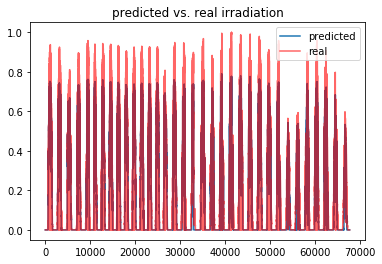

In [16]:
# plt.figure(figsize=(15, 10))
plt.plot(scaled_test_features.DC_POWER, label='predicted')
plt.plot(X_test_df.DC_POWER, label='real', color='r', alpha=0.6)
plt.title('predicted vs. real irradiation')
plt.legend()
plt.show()

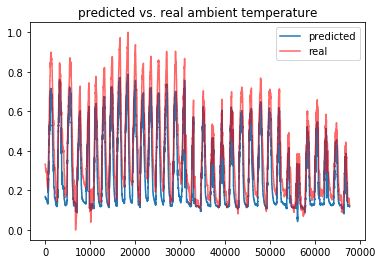

In [17]:
# plt.figure(figsize=(15, 10))
plt.plot(scaled_test_features.AMBIENT_TEMPERATURE, label='predicted')
plt.plot(X_test_df.AMBIENT_TEMPERATURE, label='real', color='r', alpha=0.6)
plt.title('predicted vs. real ambient temperature')
plt.legend()
plt.show()

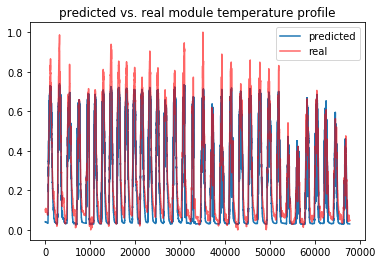

In [18]:
# plt.figure(figsize=(15, 10))
plt.plot(scaled_test_features.MODULE_TEMPERATURE, label='predicted')
plt.plot(X_test_df.MODULE_TEMPERATURE, label='real', color='r', alpha=0.6)
plt.title('predicted vs. real module temperature profile')
plt.legend()
plt.show()

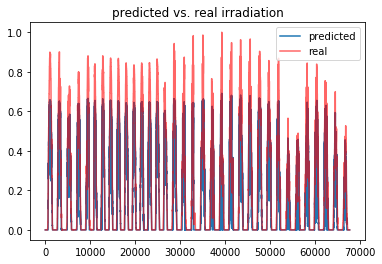

In [19]:
# plt.figure(figsize=(15, 10))
plt.plot(scaled_test_features.IRRADIATION, label='predicted')
plt.plot(X_test_df.IRRADIATION, label='real', color='r', alpha=0.6)
plt.title('predicted vs. real irradiation')
plt.legend()
plt.show()